Neural Network model

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

Read in data - StandardScaled and SMOTE min, just data itself and the DL data (i.e. data but only the variables used in the model)

In [3]:
data_ss_train_df = pd.read_csv('data_smin_ss_train_csv')
data_ss_test_df = pd.read_csv('data_ss_test_csv')
data_ss_val_df = pd.read_csv('data_ss_val_csv')

data_train_df = pd.read_csv("data_train_csv")
data_test_df = pd.read_csv("data_test_csv")
data_val_df = pd.read_csv("data_val_csv")

dl_train_df = data_train_df[['Wickets taken', 'Remainder', 'Winner_num']]
dl_test_df = data_test_df[['Wickets taken', 'Remainder', 'Winner_num']]
dl_val_df = data_val_df[['Wickets taken', 'Remainder', 'Winner_num']]

In [4]:
#own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
from data_formatting import data_format

In [5]:
X_ss_train, X_ss_test, X_ss_val, y_ss_train, y_ss_test, y_ss_val = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, None, None)
X_ss_train_sample, X_ss_test_sample, X_ss_val_sample, y_ss_train_sample, y_ss_test_sample, y_ss_val_sample = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, 'sample', 20)
X_dl_train, X_dl_test, X_dl_val, y_dl_train, y_dl_test, y_dl_val = data_format(dl_train_df, dl_test_df, dl_val_df, None, None)

DL baseline model

In [1]:
labels = ['Team 1', 'Tie', 'Team 2']

In [6]:
# Define the model
model = models.Sequential()

X_train_dim = X_dl_train.shape[1]

# Add input layer and hidden layers
model.add(layers.Dense(64, activation='relu', input_dim=X_train_dim))
model.add(layers.Dense(32, activation='relu'))

# Add output layer with softmax activation for multi-class classification
model.add(layers.Dense(3, activation='softmax'))

# Compile the model  # Use categorical crossentropy for multi-class classification

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


#https://datascience.stackexchange.com/questions/41921/sparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy#:~:text=Mathematically%20there%20is%20no%20difference,000%20samples)%20show%20no%20difference.

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/30
6189/6189 [==============================] - 7s 1ms/step - loss: 0.6091 - accuracy: 0.7138 - val_loss: 0.6242 - val_accuracy: 0.6968
Epoch 2/30
6189/6189 [==============================] - 7s 1ms/step - loss: 0.5933 - accuracy: 0.7246 - val_loss: 0.5919 - val_accuracy: 0.7263
Epoch 3/30
6189/6189 [==============================] - 7s 1ms/step - loss: 0.5911 - accuracy: 0.7252 - val_loss: 0.5925 - val_accuracy: 0.7252
Epoch 4/30
6189/6189 [==============================] - 7s 1ms/step - loss: 0.5898 - accuracy: 0.7259 - val_loss: 0.5921 - val_accuracy: 0.7249
Epoch 5/30
6189/6189 [==============================] - 7s 1ms/step - loss: 0.5887 - accuracy: 0.7269 - val_loss: 0.5882 - val_accuracy: 0.7270
Epoch 6/30
6189/6189 [==============================] - 8s 1ms/step - loss: 0.5879 - accuracy: 0.7268 - val_loss: 0.5865 - val_accuracy: 0.7281
Epoch 7/30
6189/6189 [==============================] - 7s 1ms/step - loss: 0.5874 - accuracy: 0.7265 - val_loss: 0.5862 - val_accuracy:

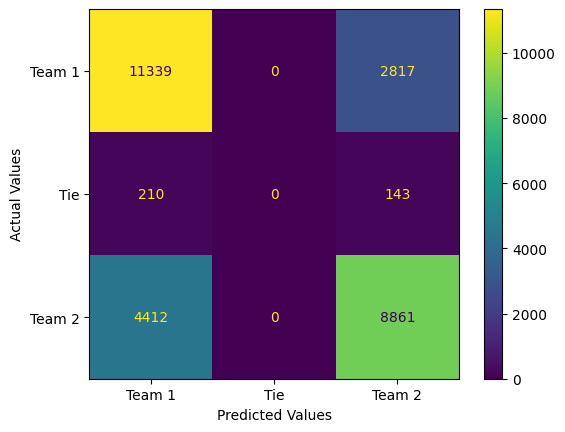

              precision    recall  f1-score   support

      Team 1       0.71      0.80      0.75     14156
         Tie       0.00      0.00      0.00       353
      Team 2       0.75      0.67      0.71     13273

    accuracy                           0.73     27782
   macro avg       0.49      0.49      0.49     27782
weighted avg       0.72      0.73      0.72     27782



C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469

In [7]:
history = model.fit(X_dl_train, y_dl_train, epochs=30, batch_size=32, validation_data=(X_dl_val, y_dl_val))

test_loss, test_acc = model.evaluate(X_dl_test, y_dl_test)
print(f'Test accuracy: {test_acc}')

predictions = model.predict(X_dl_test)

y_test_pred = model.predict(X_dl_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(y_dl_test, y_test_pred_classes)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_dl_test, y_test_pred_classes, target_names=labels))

Baseline Neural Network from data

In [8]:
# Define the model
model = models.Sequential()

X_train_dim = X_ss_train.shape[1]

# Add input layer and hidden layers
model.add(layers.Dense(64, activation='relu', input_dim=X_train_dim))
model.add(layers.Dense(32, activation='relu'))

# Add output layer with softmax activation for multi-class classification
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])
#https://datascience.stackexchange.com/questions/41921/sparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy#:~:text=Mathematically%20there%20is%20no%20difference,000%20samples)%20show%20no%20difference.

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                512       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2691 (10.51 KB)
Trainable params: 2691 (10.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/30
9255/9255 [==============================] - 10s 1ms/step - loss: 0.5597 - accuracy: 0.7616 - val_loss: 0.5860 - val_accuracy: 0.7184
Epoch 2/30
9255/9255 [==============================] - 10s 1ms/step - loss: 0.4076 - accuracy: 0.8161 - val_loss: 0.5590 - val_accuracy: 0.7361
Epoch 3/30
9255/9255 [==============================] - 10s 1ms/step - loss: 0.3780 - accuracy: 0.8258 - val_loss: 0.5261 - val_accuracy: 0.7487
Epoch 4/30
9255/9255 [==============================] - 11s 1ms/step - loss: 0.3617 - accuracy: 0.8320 - val_loss: 0.5086 - val_accuracy: 0.7590
Epoch 5/30
9255/9255 [==============================] - 10s 1ms/step - loss: 0.3500 - accuracy: 0.8360 - val_loss: 0.4943 - val_accuracy: 0.7594
Epoch 6/30
9255/9255 [==============================] - 10s 1ms/step - loss: 0.3414 - accuracy: 0.8396 - val_loss: 0.4945 - val_accuracy: 0.7672
Epoch 7/30
9255/9255 [==============================] - 10s 1ms/step - loss: 0.3328 - accuracy: 0.8434 - val_loss: 0.4799 - val_ac

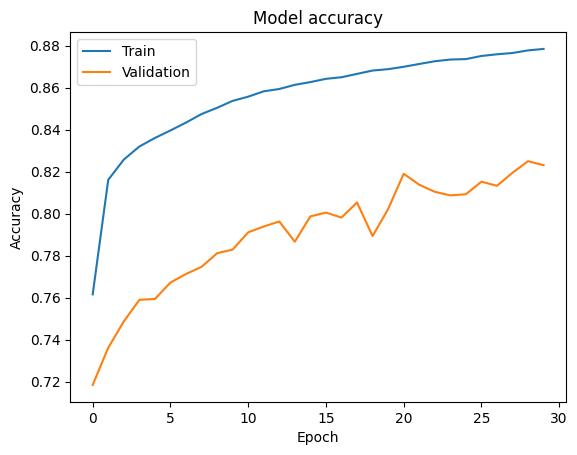

869/869 [==============================] - 1s 659us/step


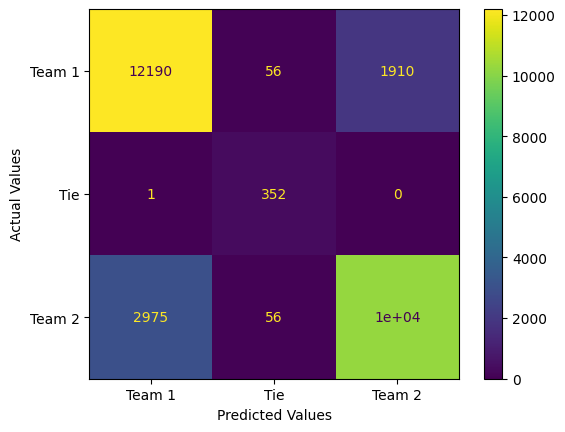

              precision    recall  f1-score   support

      Team 1       0.80      0.86      0.83     14156
         Tie       0.76      1.00      0.86       353
      Team 2       0.84      0.77      0.81     13273

    accuracy                           0.82     27782
   macro avg       0.80      0.88      0.83     27782
weighted avg       0.82      0.82      0.82     27782



In [9]:
history = model.fit(X_ss_train, y_ss_train, epochs=30, batch_size=32, validation_data=(X_ss_val, y_ss_val))

test_loss, test_acc = model.evaluate(X_ss_test, y_ss_test)
print(f'Test accuracy: {test_acc}')

predictions = model.predict(X_ss_test)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

y_test_pred = model.predict(X_ss_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(y_ss_test, y_test_pred_classes)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_ss_test, y_test_pred_classes, target_names=labels))

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/#:~:text=in%20general%2C%20it%20is%20not,greater%20than%2010%5E%2D6.

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

Neural Network Tuning

Parameter grid defined - model then trained on all the combinations

In [10]:
param_grid = {
    #Didn't include 0 as that would mean the data was linearly separable
    'hidden_layers': [1, 2, 3, 4, 5],
    'neurons': [50, 100, 150, 200, 250, 300],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1]
    }

In [11]:
#Weights still assigned randomly but in a reproducible way
np.random.seed(7)
tf.random.set_seed(7)

def create_model(hidden_layers, neurons, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(3, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Shape of input is same as my independent variables in training set
input_dim = X_ss_train.shape[1]


# lists
hidden_layers_list = []
neurons_list = []
dropout_rate_list = []
learning_rate_list = []
epochs_list = []
train_accuracy_list = []
val_accuracy_list = []

# Track the best model and its performance
best_model = None
best_epochs = float('inf')
best_accuracy = 0.0

# Iterate over hyperparameter combinations
for hidden_layers in param_grid['hidden_layers']:
    for neurons in param_grid['neurons']:
        for dropout_rate in param_grid['dropout_rate']:
            for learning_rate in param_grid['learning_rate']:
                print(f"Training model with {hidden_layers} hidden layers, {neurons} neurons, "
                      f"{dropout_rate} dropout, and {learning_rate} learning rate.")
                
                # Create the model
                model = create_model(hidden_layers, neurons, dropout_rate, learning_rate)
                
                # Set up early stopping - Patience chosen so that there's less of a chance of getting caught in a local minima 
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


                # Train the model
                history = model.fit(X_ss_train_sample, y_ss_train_sample, epochs=200, batch_size=32,
                                    validation_data=(X_ss_val_sample, y_ss_val_sample), callbacks=[early_stopping])
                

                
                # Get the number of epochs it took for early stopping
                epochs = len(history.history['loss'])
                print(f"Early stopped after {epochs} epochs.")
                
                #Evaliud
                _, train_accuracy = model.evaluate(X_ss_train_sample, y_ss_train_sample)

                # Evaluate on validation set
                _, val_accuracy = model.evaluate(X_ss_val_sample, y_ss_val_sample)
                print(f"Validation accuracy: {val_accuracy}\n")

                hidden_layers_list.append(hidden_layers)
                neurons_list.append(neurons)
                dropout_rate_list.append(dropout_rate)
                learning_rate_list.append(learning_rate)
                epochs_list.append(epochs)
                train_accuracy_list.append(train_accuracy)
                val_accuracy_list.append(val_accuracy)

                
                
                # Check if this model is the best so far
                if val_accuracy > best_accuracy:
                    best_accuracy = val_accuracy
                    best_model = model
                    best_epochs = epochs
                    best_hidden_layers = hidden_layers
                    best_neurons = neurons
                    best_dropout_rate = dropout_rate
                    best_learning_rate = learning_rate


print(f"Best model achieved {best_accuracy} accuracy on the validation set after {best_epochs} epochs, {best_hidden_layers} layers, {best_neurons} neurons, {best_dropout_rate} dropout rate and {best_learning_rate} learning rate")

params_df = pd.DataFrame({'hidden layers': hidden_layers_list, 'neurons': neurons_list, 'dropout rate': dropout_rate_list, 'learning rate': learning_rate_list, 'epochs': epochs_list, 'train accuracy': train_accuracy_list, 'val accuracy': val_accuracy_list})

Training model with 1 hidden layers, 50 neurons, 0.1 dropout, and 0.0001 learning rate.
Epoch 1/200
463/463 [==============================] - 1s 1ms/step - loss: 1.0773 - accuracy: 0.4191 - val_loss: 0.9814 - val_accuracy: 0.5706
Epoch 2/200
463/463 [==============================] - 1s 1ms/step - loss: 1.0134 - accuracy: 0.4924 - val_loss: 0.9589 - val_accuracy: 0.6058
Epoch 3/200
463/463 [==============================] - 1s 1ms/step - loss: 0.9898 - accuracy: 0.5100 - val_loss: 0.9503 - val_accuracy: 0.6094
Epoch 4/200
463/463 [==============================] - 1s 1ms/step - loss: 0.9747 - accuracy: 0.5170 - val_loss: 0.9428 - val_accuracy: 0.6134
Epoch 5/200
463/463 [==============================] - 1s 1ms/step - loss: 0.9657 - accuracy: 0.5253 - val_loss: 0.9381 - val_accuracy: 0.6127
Epoch 6/200
463/463 [==============================] - 1s 1ms/step - loss: 0.9588 - accuracy: 0.5349 - val_loss: 0.9357 - val_accuracy: 0.6084
Epoch 7/200
463/463 [==============================] -

In [12]:
params_df.sort_values('val accuracy', axis=0, ascending=False, inplace=True)
params_df = params_df.reset_index(drop=True)
params_df.to_csv('params.csv')

In [13]:
params_df.head(10)

hidden layers  neurons  dropout rate  learning rate  epochs   
0              5      250           0.1          0.001      74  \
1              3      250           0.1          0.001      62   
2              4      200           0.1          0.001      55   
3              3      300           0.1          0.001      38   
4              4      250           0.1          0.001      46   
5              4      300           0.1          0.001      37   
6              3      200           0.2          0.001      81   
7              5      200           0.1          0.001      45   
8              5      150           0.1          0.001      61   
9              4      150           0.1          0.001      55   

   train accuracy  val accuracy  
0        0.944685      0.849172  
1        0.942388      0.847372  
2        0.931109      0.840173  
3        0.921721      0.825054  
4        0.923409      0.824694  
5        0.915237      0.821814  
6        0.916048      0.820374  
7        0.913346      0.820374  
8        0.921113      0.817495  
9        0.913211      0.817495

2nd best hyperparameters - much less complex than the 5 hidden layers best option 3	250	0.1	0.001 62

62 epochs is after early stopping so the performance had gone down by 62.  Looking at the accuracies themselves 58 is better than 62 so using that below for final model.

In [14]:
final_model = create_model(3, 250, 0.1, 0.001)
final_model.fit(X_ss_train, y_ss_train, epochs=58, batch_size=32, validation_data=(X_ss_val, y_ss_val))


train_loss, train_accuracy = final_model.evaluate(X_ss_train, y_ss_train)
val_loss, val_accuracy = final_model.evaluate(X_ss_val, y_ss_val)
test_loss, test_accuracy = final_model.evaluate(X_ss_test, y_ss_test)

print(f'Training Accuracy: {train_accuracy: .2f}, Validation Accuracy: {val_accuracy: .2f}, Test Accuracy: {test_accuracy: .2f}')
print(f'Training Loss {train_loss: .2f}, Validation Loss: {val_loss: .2f}, Test Loss: {test_loss: .2f}')

Epoch 1/58
5720/9255 [=================>............] - ETA: 8s - loss: 0.4711 - accuracy: 0.7881

869/869 [==============================] - 1s 894us/step


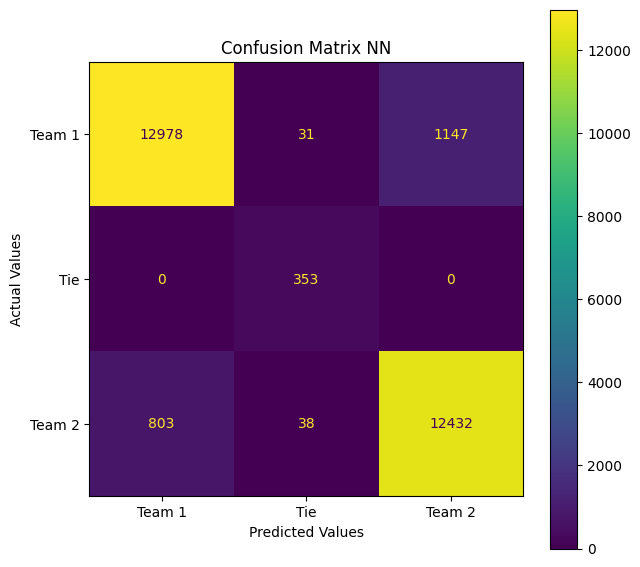

              precision    recall  f1-score   support

      Team 1       0.94      0.92      0.93     14156
         Tie       0.84      1.00      0.91       353
      Team 2       0.92      0.94      0.93     13273

    accuracy                           0.93     27782
   macro avg       0.90      0.95      0.92     27782
weighted avg       0.93      0.93      0.93     27782



In [62]:
y_test_pred = final_model.predict(X_ss_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(y_ss_test, y_test_pred_classes)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(7,7))
cmd.plot(ax=ax)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
ax.set_title('Confusion Matrix NN')
plt.grid(False)
plt.show()

print(classification_report(y_ss_test, y_test_pred_classes, target_names=labels))

Training without learning rate

In [14]:
print("NN Hyperparameter training no learning_rate")
np.random.seed(7)
tf.random.set_seed(7)

def create_model(hidden_layers, neurons, dropout_rate):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(3, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Shape of input is same as my independent variables in training set
input_dim = X_ss_train.shape[1]


# lists
hidden_layers_list = []
neurons_list = []
dropout_rate_list = []
#learning_rate_list = []
epochs_list = []
train_accuracy_list = []
val_accuracy_list = []

# Track the best model and its performance
best_model = None
best_epochs = float('inf')
best_accuracy = 0.0

# Iterate over hyperparameter combinations
for hidden_layers in param_grid['hidden_layers']:
    for neurons in param_grid['neurons']:
        for dropout_rate in param_grid['dropout_rate']:
            #for learning_rate in param_grid['learning_rate']:
            print(f"Training model with {hidden_layers} hidden layers, {neurons} neurons, {dropout_rate} dropout")
        
            # Create the model
            model = create_model(hidden_layers, neurons, dropout_rate)
                
            # Set up early stopping - Patience chosen so that there's less of a chance of getting caught in a local minima 
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


            # Train the model
            history = model.fit(X_ss_train_sample, y_ss_train_sample, epochs=200, batch_size=32, validation_data=(X_ss_val_sample, y_ss_val_sample), callbacks=[early_stopping])
                
            # Get the number of epochs it took for early stopping
            epochs = len(history.history['loss'])
            print(f"Early stopped after {epochs} epochs.")
                
            #Evaliud
            _, train_accuracy = model.evaluate(X_ss_train_sample, y_ss_train_sample)

            # Evaluate on validation set
            _, val_accuracy = model.evaluate(X_ss_val_sample, y_ss_val_sample)
            print(f"Validation accuracy: {val_accuracy}\n")

            hidden_layers_list.append(hidden_layers)
            neurons_list.append(neurons)
            dropout_rate_list.append(dropout_rate)
            epochs_list.append(epochs)
            train_accuracy_list.append(train_accuracy)
            val_accuracy_list.append(val_accuracy)

                
                
            # Check if this model is the best so far
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_model = model
                best_epochs = epochs
                best_hidden_layers = hidden_layers
                best_neurons = neurons
                best_dropout_rate = dropout_rate


print(f"Best model achieved {best_accuracy} accuracy on the validation set after {best_epochs} epochs, {best_hidden_layers} layers, {best_neurons} neurons, {best_dropout_rate} dropout rate")
params_nolr_df = pd.DataFrame({'hidden layers': hidden_layers_list, 'neurons': neurons_list, 'dropout rate': dropout_rate_list, 'epochs': epochs_list, 'train accuracy': train_accuracy_list, 'val accuracy': val_accuracy_list})

NN Hyperparameter training no learning_rate
Training model with 1 hidden layers, 50 neurons, 0.1 dropout
Epoch 1/200
463/463 [==============================] - 1s 2ms/step - loss: 0.9790 - accuracy: 0.5070 - val_loss: 0.9270 - val_accuracy: 0.6174
Epoch 2/200
463/463 [==============================] - 1s 2ms/step - loss: 0.9222 - accuracy: 0.5619 - val_loss: 0.8979 - val_accuracy: 0.6263
Epoch 3/200
463/463 [==============================] - 1s 2ms/step - loss: 0.8988 - accuracy: 0.5792 - val_loss: 0.9023 - val_accuracy: 0.6102
Epoch 4/200
463/463 [==============================] - 1s 2ms/step - loss: 0.8788 - accuracy: 0.5980 - val_loss: 0.8904 - val_accuracy: 0.6210
Epoch 5/200
463/463 [==============================] - 1s 2ms/step - loss: 0.8588 - accuracy: 0.6151 - val_loss: 0.8995 - val_accuracy: 0.6087
Epoch 6/200
463/463 [==============================] - 1s 2ms/step - loss: 0.8441 - accuracy: 0.6232 - val_loss: 0.8762 - val_accuracy: 0.6159
Epoch 7/200
463/463 [================

463/463 [==============================] - 1s 2ms/step - loss: 0.9185 - accuracy: 0.5604 - val_loss: 0.8973 - val_accuracy: 0.6066
Epoch 16/200
463/463 [==============================] - 1s 2ms/step - loss: 0.9113 - accuracy: 0.5651 - val_loss: 0.8930 - val_accuracy: 0.6051
Epoch 17/200
463/463 [==============================] - 1s 2ms/step - loss: 0.9119 - accuracy: 0.5657 - val_loss: 0.8846 - val_accuracy: 0.5954
Epoch 18/200
463/463 [==============================] - 1s 2ms/step - loss: 0.9092 - accuracy: 0.5696 - val_loss: 0.9091 - val_accuracy: 0.5634
Epoch 19/200
463/463 [==============================] - 1s 2ms/step - loss: 0.9093 - accuracy: 0.5678 - val_loss: 0.9160 - val_accuracy: 0.5454
Epoch 20/200
463/463 [==============================] - 1s 2ms/step - loss: 0.9055 - accuracy: 0.5732 - val_loss: 0.9270 - val_accuracy: 0.5338
Epoch 21/200
463/463 [==============================] - 1s 2ms/step - loss: 0.9071 - accuracy: 0.5684 - val_loss: 0.9262 - val_accuracy: 0.5187
Epoch

In [35]:
params_nolr_df
params_nolr_df.sort_values('val accuracy', axis=0, ascending=False, inplace=True)
params_nolr_df = params_nolr_df.reset_index(drop=True)
params_nolr_df.to_csv('params_nolr.csv')

In [38]:
params_nolr_df.head(10)

hidden layers  neurons  dropout rate  epochs  train accuracy  val accuracy
0              4      150           0.1      90        0.941780      0.844132
1              4      300           0.1      43        0.929556      0.832253
2              3      300           0.1      46        0.933743      0.832253
3              3      250           0.1      46        0.923409      0.831173
4              4      250           0.1      54        0.929893      0.828654
5              3      150           0.1      60        0.918817      0.825054
6              5      300           0.1      44        0.922869      0.823974
7              3      250           0.2      52        0.903418      0.808495
8              4      300           0.2      45        0.898622      0.808495
9              4      200           0.1      39        0.901864      0.807055

In [8]:
input_dim = X_ss_train.shape[1]

#No learning rate training
def create_model(hidden_layers, neurons, dropout_rate):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(3, activation='softmax'))  #3 classes and therefore cannot use Sigmoid
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Training a NN with no learning rate training
4th best hyperparameters 3, 250, 0.1 and 46.  Best epoch 44 as 46 was after early stopping.

In [9]:
#no learning rate training
no_l_model = create_model(3, 250, 0.1)
no_l_model .fit(X_ss_train, y_ss_train, epochs=44, batch_size=32, validation_data=(X_ss_val, y_ss_val))


train_loss, train_accuracy = no_l_model .evaluate(X_ss_train, y_ss_train)
val_loss, val_accuracy = no_l_model .evaluate(X_ss_val, y_ss_val)
test_loss, test_accuracy = no_l_model.evaluate(X_ss_test, y_ss_test)

print(f'Training Accuracy: {train_accuracy: .2f}, Validation Accuracy: {val_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')
print(f'Training Loss {train_loss: .2f}, Validation Loss: {val_loss: .2f}, Test Loss: {test_loss: .2f}')

Epoch 1/44
9255/9255 [==============================] - 24s 3ms/step - loss: 0.4290 - accuracy: 0.8046 - val_loss: 0.4838 - val_accuracy: 0.7716
Epoch 2/44
9255/9255 [==============================] - 25s 3ms/step - loss: 0.3100 - accuracy: 0.8561 - val_loss: 0.3747 - val_accuracy: 0.8279
Epoch 3/44
9255/9255 [==============================] - 23s 2ms/step - loss: 0.2649 - accuracy: 0.8791 - val_loss: 0.3180 - val_accuracy: 0.8578
Epoch 4/44
9255/9255 [==============================] - 23s 2ms/step - loss: 0.2387 - accuracy: 0.8917 - val_loss: 0.2877 - val_accuracy: 0.8689
Epoch 5/44
9255/9255 [==============================] - 23s 2ms/step - loss: 0.2236 - accuracy: 0.8990 - val_loss: 0.2709 - val_accuracy: 0.8782
Epoch 6/44
9255/9255 [==============================] - 23s 2ms/step - loss: 0.2104 - accuracy: 0.9056 - val_loss: 0.2495 - val_accuracy: 0.8871
Epoch 7/44
9255/9255 [==============================] - 32s 3ms/step - loss: 0.2024 - accuracy: 0.9094 - val_loss: 0.2438 - val_ac

869/869 [==============================] - 1s 924us/step


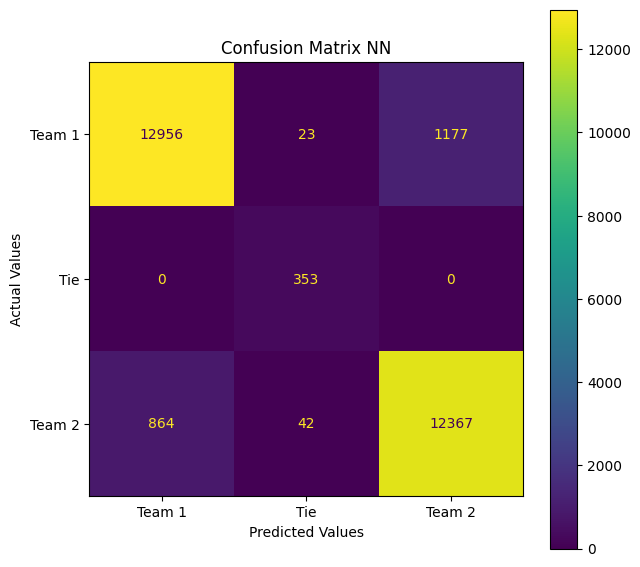

              precision    recall  f1-score   support

      Team 1       0.94      0.92      0.93     14156
         Tie       0.84      1.00      0.92       353
      Team 2       0.91      0.93      0.92     13273

    accuracy                           0.92     27782
   macro avg       0.90      0.95      0.92     27782
weighted avg       0.92      0.92      0.92     27782



In [10]:
y_test_no_l_pred = no_l_model.predict(X_ss_test)
y_test_no_l_pred_classes = np.argmax(y_test_no_l_pred, axis=1)

cm = confusion_matrix(y_ss_test, y_test_no_l_pred_classes)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(7,7))
cmd.plot(ax=ax)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
ax.set_title('Confusion Matrix NN')
plt.grid(False)
plt.show()

print(classification_report(y_ss_test, y_test_no_l_pred_classes, target_names=labels))

Distribution of classes (model with learning rate training)

In [ ]:
y_test_pred_list  = []
for y in y_test_pred_classes:
    if y==0:
        y_test_pred_list.append("Team 1")
    elif y == 2:
        y_test_pred_list.append("Team 2")
    elif y==1:
        y_test_pred_list.append("Tie")

y_test_pred_df = pd.DataFrame(y_test_pred_list, columns=["NN Winner"])

NameError: name 'y_test_pred_classes' is not defined

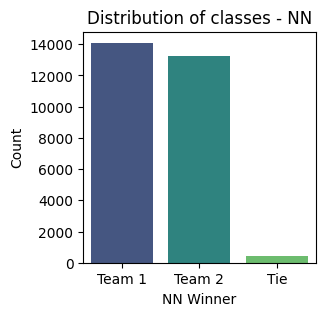

In [55]:
plt.figure(figsize=(3, 3))
sns.countplot(x='NN Winner', data=y_test_pred_df, palette='viridis')

# Adding labels and title
plt.ylabel('Count')
plt.title('Distribution of classes - NN')
plt.show()

In [56]:
y_test_pred_df.value_counts(normalize=True)

NN Winner
Team 1       0.507271
Team 2       0.477683
Tie          0.015046
Name: proportion, dtype: float64